In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import requests
import time
from datetime import datetime

%matplotlib inline
def mse(imageA,imageB):
    err=np.sum((imageA.astype("float")-imageB.astype("float"))**2)
    err /= float(imageA.shape[0]*imageA.shape[1])
    return err
    
# print mse(pic2,pic3)
    
    
def getnumber(pic):
    min_a=999999999999999999999
    min_png=None
    for png in os.listdir('alphabet'):
        ref =cv2.imread("alphabet/"+png)
        if mse(ref,pic)<min_a:
            min_a=mse(ref,pic)
            min_png=png
    cn_temp=min_png.split('.')[0]
    return cn_temp

def cn_yanzhengma(r):
        
    image=cv2.imread("cn.png")
#     plt.imshow(image)
    cv2.resize(image,(100,100))
    kernel=np.ones((2,2),np.uint8)
    blurred=cv2.GaussianBlur(image,(3,3),0)
    edged=cv2.Canny(blurred,30,350)
    dilation=cv2.dilate(edged,kernel,iterations=1)

    plt.imshow(image)
#     image,contours,hierarchy=cv2.findContours(dilation.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x: x[1])

#     ary=[]
#     cn_x=0
#     cn_y=0
#     cn_i=0
#     for (c,_) in cnts:
#         (x,y,w,h)=cv2.boundingRect(c)
#         if w>7 and h>7 and x<>cn_x and x-cn_x>2 :
# #             print x,y,w,h
#             cn_x=x
#     #         cn_y=y
#             if cn_i>-1:
#                 ary.append((x,y,w,h))
#                 cn_i=cn_i+1
#             else:
#                 cn_i=cn_i+1

# #     print ary
#     for id,(x,y,w,h) in enumerate(ary):
#         roi=dilation[y:y+h,x:x+w]
#         thresh=roi.copy()
#         res=cv2.resize(thresh,(100,100))
#         cv2.imwrite("%d.png"%(id),res)
#         plt.imshow(res)
         
#     pic0=cv2.imread("0.png")
#     pic1=cv2.imread("1.png")
#     pic2=cv2.imread("2.png")
#     pic3=cv2.imread("3.png")
    
#     print getnumber(pic0)+getnumber(pic1)+getnumber(pic2)+getnumber(pic3)

cn_yanzhengma(r)

NameError: name 'r' is not defined

ValueError: need more than 2 values to unpack

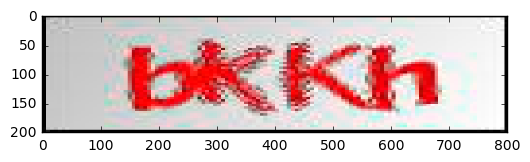

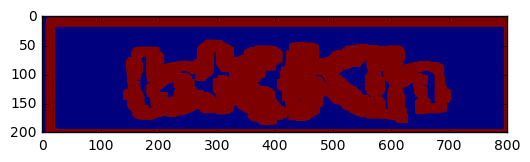

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

image=cv2.imread("cn.png")
image1=cv2.resize(image,(800,200),interpolation=cv2.INTER_NEAREST)
plt.imshow(image1)

fig=plt.figure()
kernel=np.ones((2,2),np.uint8)
blurred=cv2.GaussianBlur(image1,(17,17),0)
edged=cv2.Canny(blurred,50,100,30)
dilation=cv2.dilate(edged,kernel,iterations=15)
plt.imshow(dilation)
image,contours,hierarchy=cv2.findContours(dilation.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x: x[1])

ary=[]
cn_x=0
cn_y=0
cn_i=0
cn_w=0
for (c,_) in cnts:
    (x,y,w,h)=cv2.boundingRect(c)
    if w>50 and h>50 and x<>cn_x and x-cn_x>cn_w :
        print x,y,w,h
        cn_x=x
        cn_w=w
        if cn_i>-1:
            ary.append((x,y,w,h))
            cn_i=cn_i+1
        else:
            cn_i=cn_i+1
        
fig=plt.figure()

for id,(x,y,w,h) in enumerate(ary):
    roi=dilation[y:y+h,x:x+w]
    thresh=roi.copy()
    a=fig.add_subplot(1,len(ary),id+1)
    res=cv2.resize(thresh,(30,30),interpolation=cv2.INTER_NEAREST)
#     cv2.imwrite("%d.png"%(id),res)
    plt.imshow(res)
         

In [6]:
import os

pic0=cv2.imread("0.png")
pic1=cv2.imread("1.png")
pic2=cv2.imread("2.png")
pic3=cv2.imread("3.png")

def mse(imageA,imageB):
    err=np.sum((imageA.astype("float")-imageB.astype("float"))**2)
    err /= float(imageA.shape[0]*imageA.shape[1])
    return err
    
# print mse(pic2,pic3)
    
    
def getnumber(pic):
    min_a=999999999999999999999
    min_png=None
    for png in os.listdir('alphabet'):
        ref =cv2.imread("alphabet/"+png)
        if mse(ref,pic)<min_a:
            min_a=mse(ref,pic)
            min_png=png
    return min_png,min_a

print getnumber(pic0)
print getnumber(pic1)
print getnumber(pic2)
print getnumber(pic3)
# ref =cv2.imread("alphabet/v.png")
# print mse(ref,pic0)
# ref =cv2.imread("alphabet/y.png")
# print mse(ref,pic0)

('C.png', 21820.878000000001)
('K.png', 5969.2950000000001)
('C.png', 21853.696499999998)
('B.png', 33513.855300000003)
